In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [3]:
digits_dataset = load_digits()
print("Keys digits_dataset: \n{}".format(digits_dataset.keys()))

Keys digits_dataset: 
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [4]:
print("Цели:", digits_dataset.target)
print("Название целевых классов:", digits_dataset.target_names)
print("Название признаков:", digits_dataset.feature_names)


Цели: [0 1 2 ... 8 9 8]
Название целевых классов: [0 1 2 3 4 5 6 7 8 9]
Название признаков: ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


In [5]:
print("Описание:", digits_dataset.DESCR)

Описание: .. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This gener

In [6]:
print("Форма массива data: {} ".format(digits_dataset['data'].shape))
print("Данные:", digits_dataset.data)

Форма массива data: (1797, 64) 
Данные: [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(digits_dataset['data'], digits_dataset['target'], random_state=0)

print("Форма массива X_train: {}".format(X_train.shape))
print("Форма массива y_train: {}".format(y_train.shape))
print("Форма массива X_test: {}".format(X_test.shape))
print("Форма массива y_test: {}".format(y_test.shape))

Форма массива X_train: (1347, 64)
Форма массива y_train: (1347,)
Форма массива X_test: (450, 64)
Форма массива y_test: (450,)


In [8]:
digits_dataset_dataframe = pd.DataFrame(X_train, columns=digits_dataset.feature_names)
digits_dataset_dataframe.head(2)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,3.0,13.0,16.0,9.0,0.0,0.0,0.0,0.0,10.0,...,9.0,1.0,0.0,2.0,16.0,16.0,14.0,12.0,9.0,1.0
1,0.0,0.0,1.0,14.0,13.0,4.0,0.0,0.0,0.0,3.0,...,6.0,0.0,0.0,0.0,0.0,9.0,14.0,13.0,1.0,0.0


c:\Users\User\Desktop\Laba\big_data_laba4\myenv\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])
c:\Users\User\Desktop\Laba\big_data_laba4\myenv\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
c:\Users\User\Desktop\Laba\big_data_laba4\myenv\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
c:\Users\User\Desktop\Laba\big_data_laba4\myenv\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:115: RuntimeWarning: invalid value encountered in divide
  adj = (locs - lim1[0]) / (lim1[1] - lim1[0])
posx and posy should be 

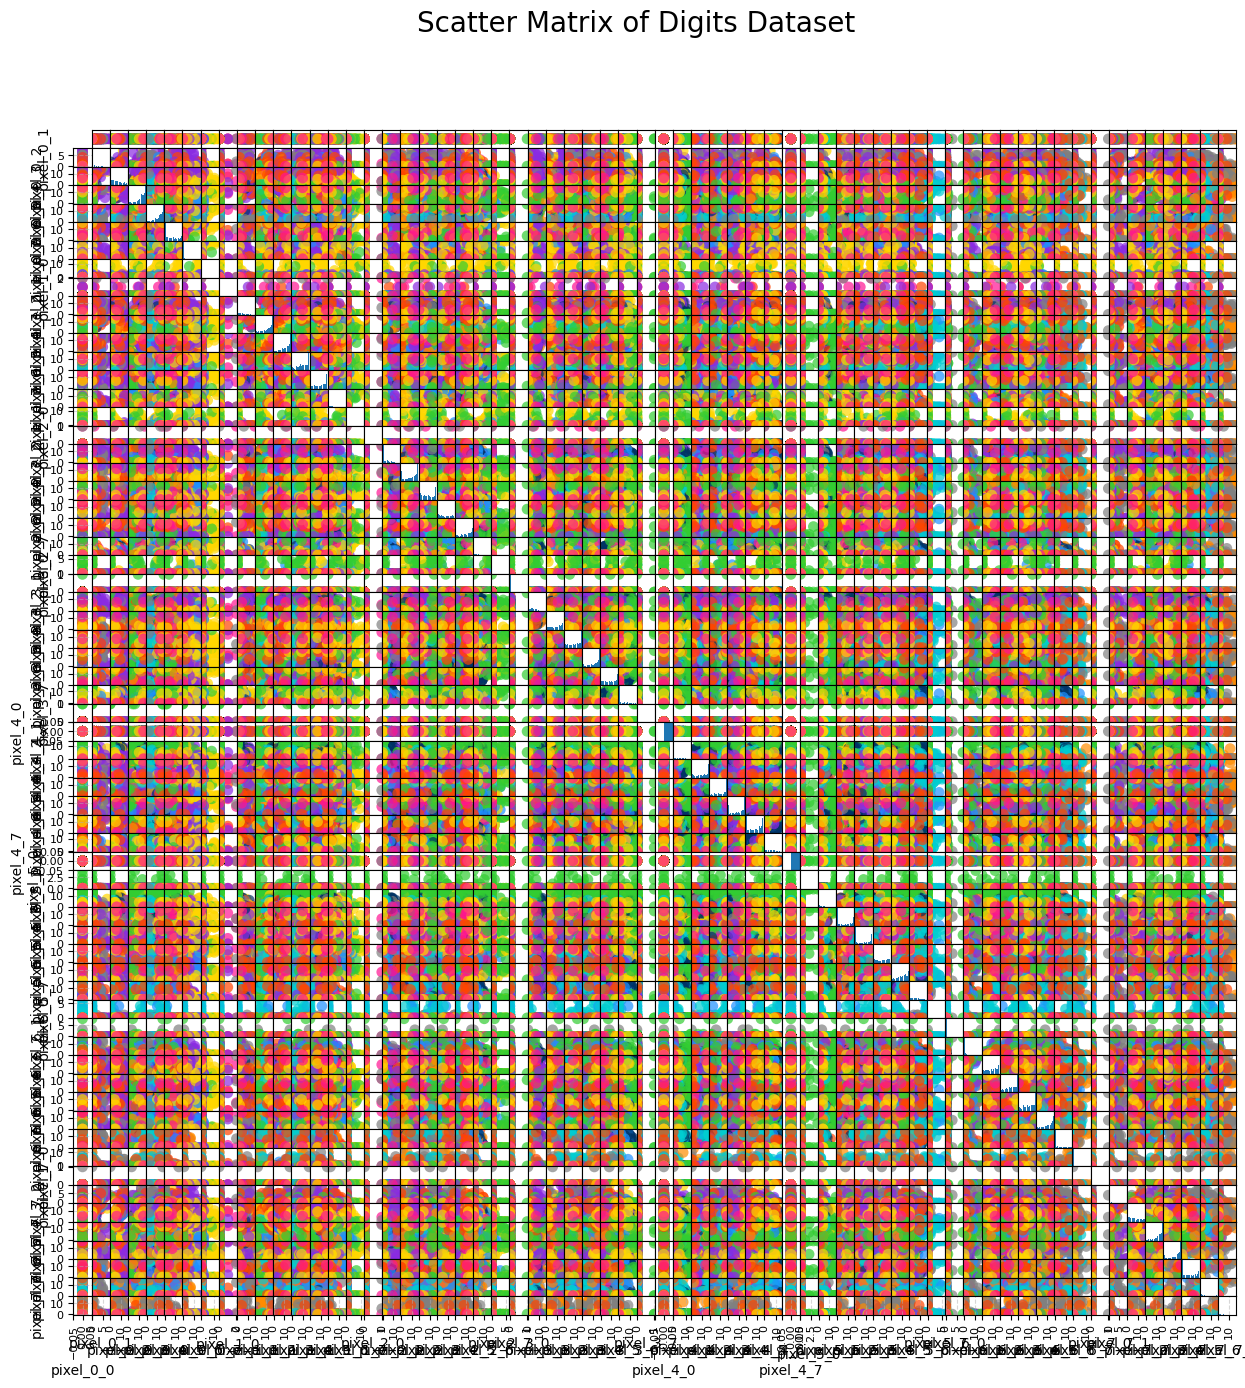

In [9]:

# Определение цветов для каждого класса
colors = ['#003366', '#FF8C00', '#808080', '#FF4500', '#32CD32',
          '#8A2BE2', '#00CED1', '#FFD700', '#FF1493', '#1E90FF']

# Создание цветового списка для y_train
point_colors = [colors[label] for label in y_train]

# Создание матрицы рассеяния с использованием point_colors
grr = pd.plotting.scatter_matrix(digits_dataset_dataframe, c=point_colors, figsize=(15, 15), marker='o',
                                 hist_kwds={'bins': 20}, s=60, alpha=0.7)


plt.suptitle('Scatter Matrix of Digits Dataset', fontsize=20)
plt.subplots_adjust(top=0.9)  

for ax in grr.flatten():
    ax.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [10]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Прогнозы для тестового набора: \n {}".format(y_pred))
print("Правильность на тестовом наборе: {:.2f}".format(
    knn.score(X_test, y_test)))

Прогнозы для тестового набора: 
 [2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 5 1 6 3 0 2 3 4 1 9 3 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 7 7 4 8 5 8 5 5 2 5 9 0 7 1 4 7 3
 4 8 9 7 9 8 2 6 5 2 5 8 4 8 7 0 6 1 5 3 9 9 5 9 9 5 7 5 6 2 8 6 9 6 1 5 1
 5 9 9 1 5 3 6 1 8 9 8 7 6 7 6 5 6 0 8 8 9 8 6 1 0 4 1 6 3 8 6 7 4 9 6 3 0
 3 3 3 0 7 7 5 7 8 0 7 8 9 6 4 5 0 1 4 6 4 3 3 0 9 5 9 2 1 4 2 1 6 8 9 2 4
 9 3 7 6 2 3 3 1 6 9 3 6 3 2 2 0 7 6 1 1 9 7 2 7 8 5 5 7 5 2 3 7 2 7 5 5 7
 0 9 1 6 5 9 7 4 3 8 0 3 6 4 6 3 2 6 8 8 8 4 6 7 5 2 4 5 3 2 4 6 9 4 5 4 3
 4 6 2 9 0 1 7 2 0 9 6 0 4 2 0 7 5 8 5 4 8 2 8 4 3 7 2 6 9 1 5 1 0 8 2 1 9
 5 6 8 2 7 2 1 5 1 6 4 5 0 9 4 1 1 7 0 8 9 0 5 4 3 8 8 6 5 3 4 4 4 8 8 7 0
 9 6 3 5 2 3 0 8 3 3 1 3 3 0 0 4 6 0 7 7 6 2 0 4 4 2 3 7 8 9 8 6 8 5 6 2 2
 3 1 7 7 8 0 3 3 2 1 5 5 9 1 3 7 0 0 7 0 4 5 9 3 3 4 3 1 8 9 8 3 6 2 1 6 2
 1 7 5 5 1 9]
Правильность на тестовом наборе: 0.99
